# ct.gov Data Extractor

Pair pubmed abstracts with their `ct.gov` data

In [86]:
from cochranenlp.readers import biviewer

ct_biviewer = biviewer.ClinicalTrialsBiViewer()

### Extract Data

In [87]:
from collections import namedtuple

Targets = namedtuple('Targets', ['abstract',
                                 'pmid',
                                 'allocation',
                                 'endpoint_classification',
                                 'intervention_model',
                                 'masking',
                                 'primary_purpose',
                                 'condition',
                                 'gender',
                                 'healthy_volunteers',
                                 'maximum_age', 'minimum_age',
                                 'phase',
                                 'study_type'])

def data_generator():
    for study in ct_biviewer:
        yield Targets(study.pubmed.text_all()['abstract'], study.pubmed.text_all()['pmid'], **study.clinicaltrials.fields)
        
data = list(data_generator())
df = pd.DataFrame(data, columns=Targets._fields)
df = df[df.abstract != ''] # filter away blank abstracts

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2126
Data columns (total 14 columns):
abstract                   2093 non-null object
pmid                       2093 non-null object
allocation                 1746 non-null object
endpoint_classification    1882 non-null object
intervention_model         2085 non-null object
masking                    2092 non-null object
primary_purpose            2015 non-null object
condition                  2093 non-null object
gender                     2093 non-null object
healthy_volunteers         2092 non-null object
maximum_age                2093 non-null object
minimum_age                2093 non-null object
phase                      2093 non-null object
study_type                 2093 non-null object
dtypes: object(14)
memory usage: 245.3+ KB


## Class Breakdowns

### Conditions

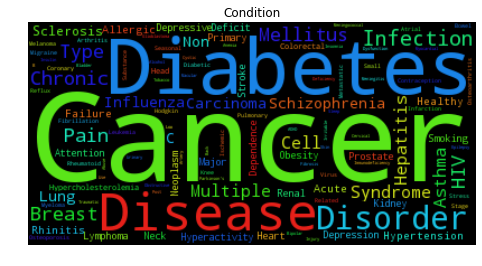

In [88]:
import wordcloud

def word_cloud(words, axes, title):
    wc = wordcloud.WordCloud().generate(words)
    axes.imshow(wc)
    axes.axis('off')
    plt.title(title)
    
fig = plt.figure(figsize=(8, 8))
axes = fig.gca()
word_cloud(' '.join(df.condition), axes, 'Condition')

### Other Targets

Minimum and maximum ages are excluded

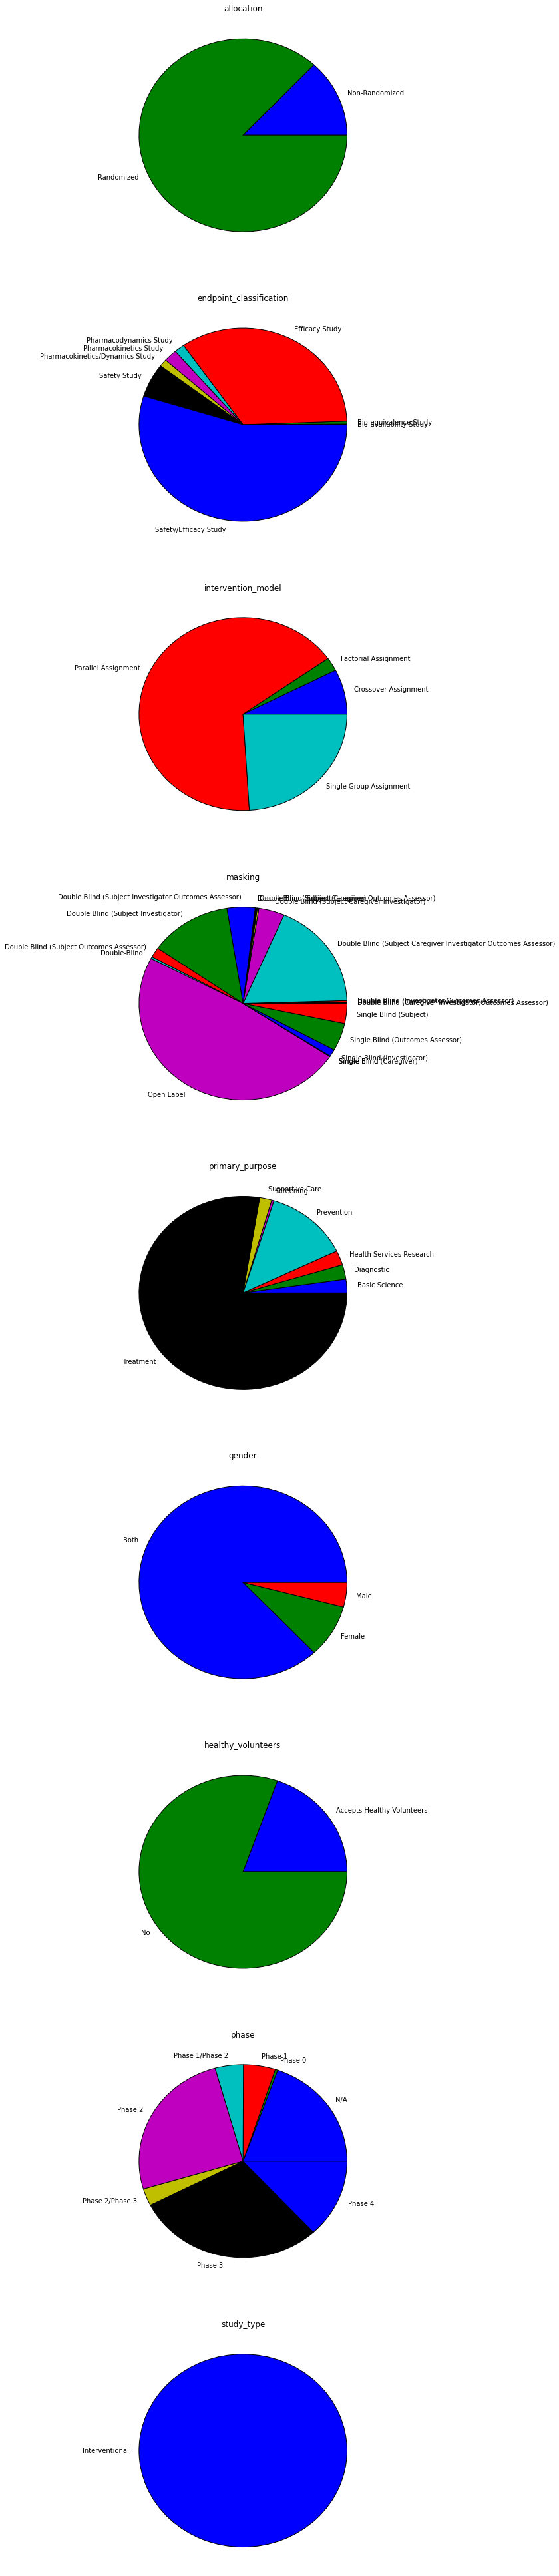

In [89]:
fig = plt.figure(figsize=(7, 100))
plt.clf()

for i, column in enumerate(df.drop(['condition', 'minimum_age', 'maximum_age'], axis=1).ix[:, 'allocation':].columns, start=1):
    axes = fig.add_subplot(13, 1, i)
    axes = df.groupby(column).size().plot(ax=axes, kind='pie', title=column)
    axes.set_ylabel('')

### Store

In [90]:
abstracts_targets = df

%store abstracts_targets

Stored 'abstracts_targets' (DataFrame)
